In [2]:
%pip install matplotlib
%pip install seaborn
%pip install nltk
%pip install textblob
%pip install gensim
%pip install wordcloud
%pip install networkx
%pip install spacy
%pip install scikit-learn
%pip install pyLDAvis
%pip install pyLDAvis.gensim
%pip install pyLDAvis.gensim_models
%pip install pyLDAvis
%pip install pyLDAvis.gensim_models
%pip install pyLDAvis.gensim

import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.decomposition import LatentDirichletAllocation
#from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from gensim.matutils import sparse2full

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

import networkx as nx
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
import spacy

from collections import Counter

from gensim.corpora import Dictionary
from gensim.models import LdaModel

from wordcloud import WordCloud


# Unmount the drive
#drive.flush_and_unmount()
#print('Drive unmounted')





Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.1 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached charset_normalizer-3.4.2-cp39-cp39-macosx_10_9_universal2.whl.metadata (35 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.4.26-py3

/Users/filiporlikowski/Documents/MINITRI_Project_2 /.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/filiporlikowski/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/filiporlikowski/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/filiporlikowski/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# **Load and Preprocess Data**

In [48]:
name = "Counter_Strike"
# File path
#file_path = '/content/drive/My Drive/reviews_with_metadata.csv'
# Step 1: Load Data

data = pd.read_csv('/Users/filiporlikowski/Documents/MINITRI_Project_2 /MINITRI_Project_2/Scrapping/Counter_Strike_cleaned_reviews.csv')

# Step 2: Clean `Hours Played`
data['Hours Played'] = data['Hours Played'].replace(',', '', regex=True).astype(float)

# Step 3: Drop Rows with Missing Reviews
data = data.dropna(subset=['Review'])

# Step 4: Define Text Preprocessing Function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Replace special characters with a space
    text = re.sub(r"[^\w\s]", " ", text)  # Keep only words and spaces
    # Replace numeric characters with a space
    text = re.sub(r"\d+", " ", text)
    # Remove non-ASCII and non-Cyrillic characters
    text = re.sub(r"[^\x00-\x7F\u0400-\u04FF\s]", " ", text)
    # Remove multiple consecutive spaces
    text = re.sub(r"\s+", " ", text).strip()
    # Tokenize text
    tokens = word_tokenize(text)
    # Load stopwords and add custom stopwords
    custom_stopwords = set(stopwords.words('english'))
    custom_stopwords.update(['o', 'etc', 'would', 'could', 'us', 'the', 'to', 'of', 'in', 'it', 'and', 'this', 'that', 'for'])  # Add custom meaningless words
    # Remove stopwords and short tokens or stand-alone letters
    tokens = [word for word in tokens if word not in custom_stopwords and len(word) > 1]
    # Filter out stand-alone letters explicitly
    tokens = [word for word in tokens if len(word) > 1 or word.isnumeric()]
    # Join tokens back into a single string
    return ' '.join(tokens)


# Step 5: Apply Text Preprocessing
data['Processed_Review'] = data['Review'].apply(preprocess_text)

# Step 6: Drop Empty Processed Reviews
data = data[data['Processed_Review'].str.strip() != ""]

# Step 7: Convert `Date` Column to Datetime Format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.to_csv(f'{name}_cleaned_processed_reviews.csv')
# Display the first few rows of the processed data
data.head()


,Game,Date,Review,Hours Played,Recommendation,Helpful Votes,Processed_Review
0,730,2016-10-19,Where can I get the English version ?,2711.8,Recommended,7335,get english version
1,730,2020-11-02,The time I spent playing this game could've be...,1900.8,Recommended,2134,time spent playing game spent studying applyin...
2,730,2019-11-04,Underage Gambling,8154.3,Not Recommended,1806,underage gambling
3,730,2023-07-15,>see a guy >hit every shot >run out of bullets...,11.9,Recommended,905,see guy hit every shot run bullets turns aroun...
4,730,2023-08-14,>aim at corner >wait for enemy >turn away for ...,172.1,Recommended,918,aim corner wait enemy turn away seconds comes ...


# **Text Tokenization and Preparation**

In [12]:
from collections import Counter
from nltk.tokenize import word_tokenize

# Step 8: Tokenize Processed Reviews
data['Tokenized_Review'] = data['Processed_Review'].apply(word_tokenize)

# Step 9: Build Vocabulary
def build_vocab_and_filter(data, min_word_freq=2):
    # Flatten all tokenized reviews to get all tokens
    all_tokens = [token for tokens in data['Tokenized_Review'] for token in tokens]
    vocab_counter = Counter(all_tokens)
    # Filter words by minimum frequency
    vocab = {word for word, count in vocab_counter.items() if count >= min_word_freq}
    return vocab

# Apply vocabulary filtering
min_word_freq = 2
vocab = build_vocab_and_filter(data, min_word_freq)

# Step 10: Filter Tokenized Reviews
data['Filtered_Review'] = data['Tokenized_Review'].apply(
    lambda tokens: [word for word in tokens if word in vocab]
)

# Step 11: Reconstruct Cleaned Documents
documents = data['Filtered_Review'].apply(lambda tokens: ' '.join(tokens))

# Step 12: Prepare Metadata
metadata = data.drop(columns=['Review', 'Processed_Review', 'Tokenized_Review', 'Filtered_Review'])

# Step 13: Save Outputs (Optional)
documents.to_csv(f'processed_{name}_documents.csv', index=False, header=['Documents'])
metadata.to_csv(f'processed_{name}_metadata.csv', index=False)

# Step 14: Display Samples
print("Sample Processed Documents:")
print(documents.head())

print("\nVocabulary Size:", len(vocab))
print("Sample Vocabulary:", list(vocab)[:10])

print("\nSample Metadata:")
print(metadata.head())


Sample Processed Documents:
0                                  get english version
1    time spent playing game spent studying applyin...
2                                             gambling
3    see guy hit every shot run bullets turns aroun...
4    aim corner wait enemy turn away seconds comes ...
Name: Filtered_Review, dtype: object

Vocabulary Size: 2708
Sample Vocabulary: ['dodo', 'process', 'failure', 'spots', 'ruined', 'built', 'insomnia', 'hutchinson', 'opportunity', 'hahaha']

Sample Metadata:
   Game       Date  Hours Played   Recommendation  Helpful Votes
0   730 2016-10-19        2711.8      Recommended           7335
1   730 2020-11-02        1900.8      Recommended           2134
2   730 2019-11-04        8154.3  Not Recommended           1806
3   730 2023-07-15          11.9      Recommended            905
4   730 2023-08-14         172.1      Recommended            918


# **Sentiment Analysis**
Building World Clouds
Extracted key terms for each topic using labelTopics.
Visualized top words.
without date included

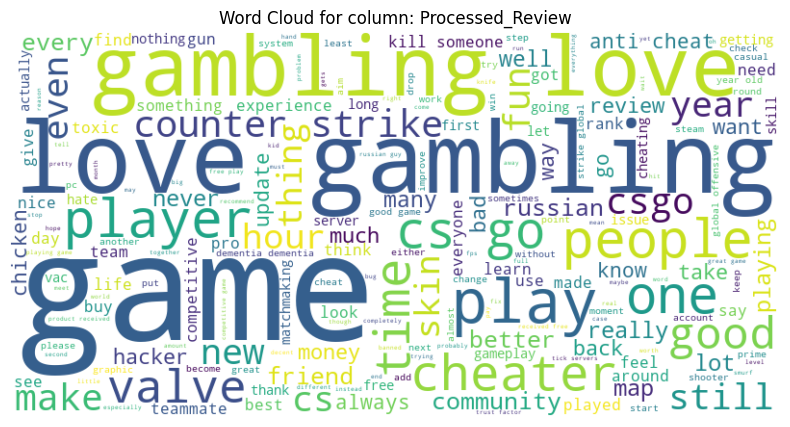

In [49]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = pd.read_csv(f'{name}_cleaned_processed_reviews.csv')# Select the column with text (e.g., 'review_text')
text_column = 'Processed_Review'
text_data = data[text_column].dropna().astype(str).str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    collocations=True  # Avoid duplicate phrases
).generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for column: {text_column}')
plt.show()


In [ ]:
with dates included, before and after the update


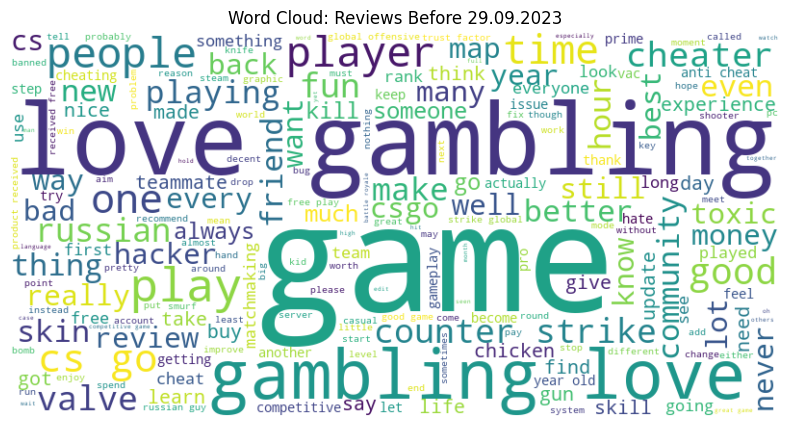

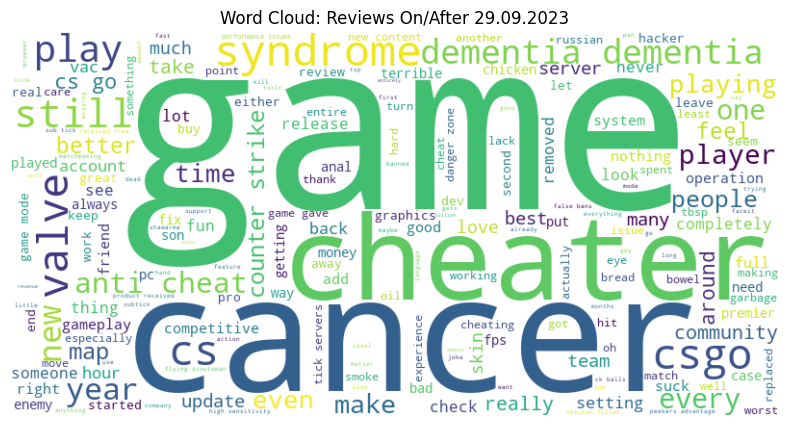

In [52]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('Counter_Strike_cleaned_processed_reviews.csv')

# Convert 'date' column to datetime (adjust the column name if needed)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Split data into two periods
date_split = pd.Timestamp('2023-09-29')
before_df = data[data['Date'] < date_split]
after_df = data[data['Date'] >= date_split]

text_column = 'Processed_Review'

def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=200,
        collocations=True
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Prepare text for each period
text_before = before_df[text_column].dropna().astype(str).str.cat(sep=' ')
text_after = after_df[text_column].dropna().astype(str).str.cat(sep=' ')

# Generate and show word clouds
generate_wordcloud(text_before, 'Word Cloud: Reviews Before 29.09.2023')
generate_wordcloud(text_after, 'Word Cloud: Reviews On/After 29.09.2023')


# **Word Frequencies**
without date included

         word  frequency
6        game        854
43       love        552
59   gambling        504
74         cs        267
0         get        245
285      play        235
75         go        212
112      like        189
70        one        182
56     people        171
201      good        158
3        time        156
282   someone        150
204  cheaters        148
376     valve        131
163   counter        120
117      team        118
317   players        117
5     playing        116
63      every        116


/var/folders/ss/1qcx7q7n50z1ltqpq2jfcvb40000gn/T/ipykernel_13183/2262072920.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=freq_df, palette='viridis')


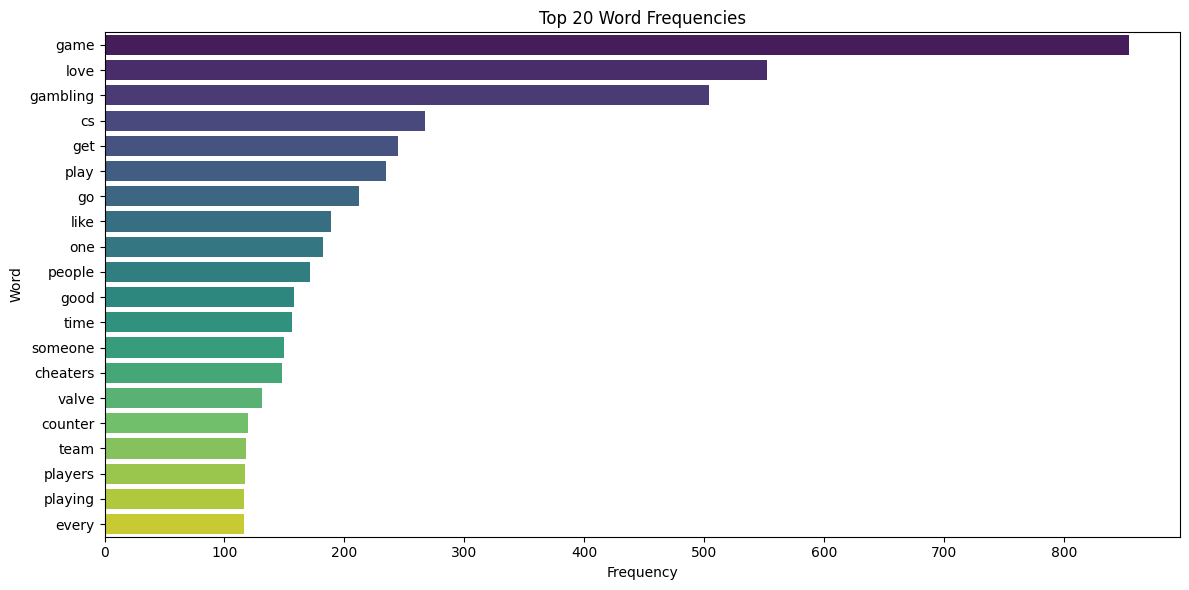

In [50]:
import pandas as pd
from collections import Counter
import re

# Select the column with text (e.g., 'review_text')
text_column = 'Processed_Review'  # Change to your actual column name
# Combine all text into one large string
all_text = ' '.join(data[text_column].dropna().astype(str).tolist())

# Basic cleaning: remove punctuation and make lowercase
cleaned_text = re.sub(r'[^\w\s]', '', all_text.lower())

# Tokenize
words = cleaned_text.split()

# Count word frequencies
word_freq = Counter(words)

# Convert to DataFrame and show top 20
freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])
freq_df = freq_df.sort_values(by='frequency', ascending=False)

print(freq_df.head(20))
freq_df = freq_df.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='word', data=freq_df, palette='viridis')
plt.title('Top 20 Word Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()


In [ ]:
after and before update

/var/folders/ss/1qcx7q7n50z1ltqpq2jfcvb40000gn/T/ipykernel_13183/1418950254.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=freq_df, palette='viridis')


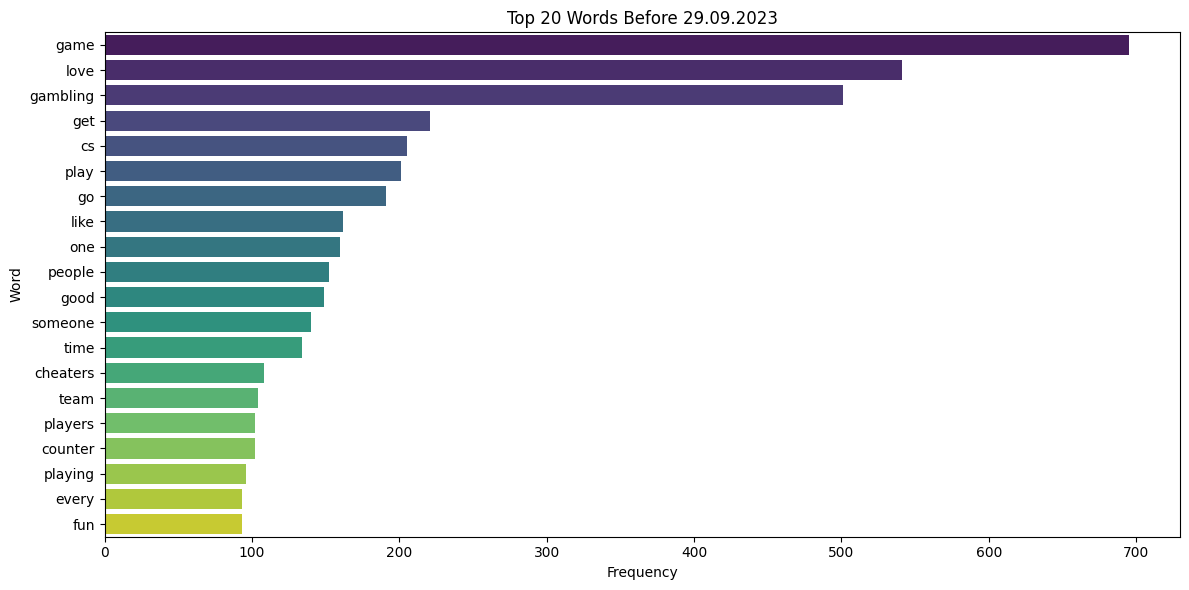

/var/folders/ss/1qcx7q7n50z1ltqpq2jfcvb40000gn/T/ipykernel_13183/1418950254.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=freq_df, palette='viridis')


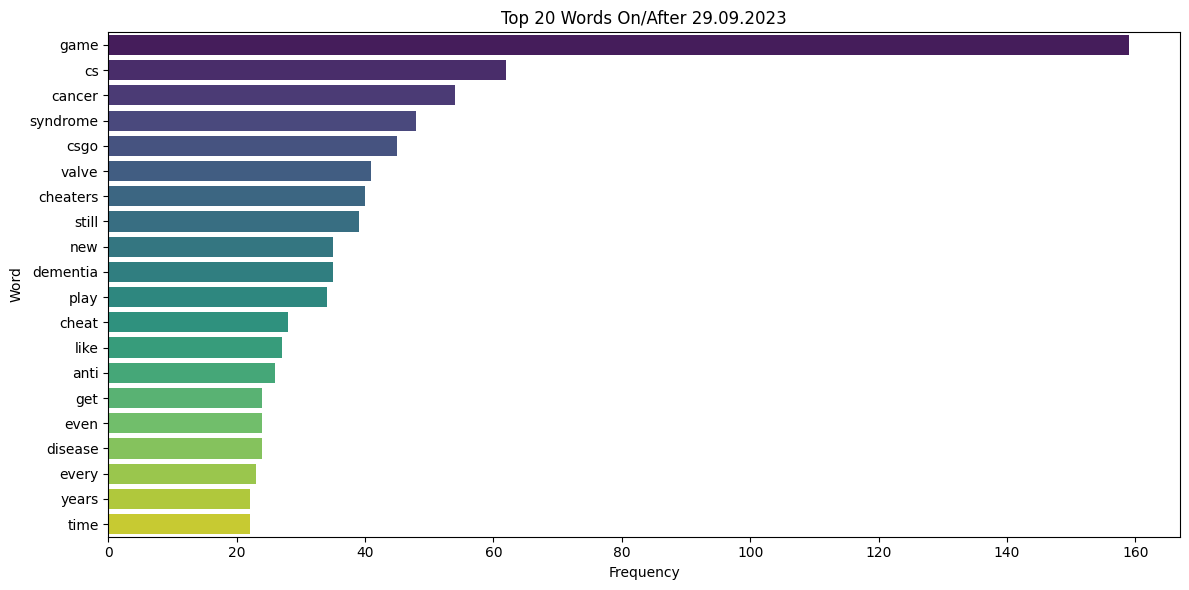

In [55]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('Counter_Strike_cleaned_processed_reviews.csv')

# Convert date column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # replace 'date' with your date column name

# Define date cutoff
cutoff_date = pd.Timestamp('2023-09-29')

# Function to get top word frequencies and plot
def plot_top_words(df, text_col, title):
    all_text = ' '.join(df[text_col].dropna().astype(str).tolist())
    cleaned_text = re.sub(r'[^\w\s]', '', all_text.lower())
    words = cleaned_text.split()
    word_freq = Counter(words)
    freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])
    freq_df = freq_df.sort_values(by='frequency', ascending=False).head(20)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='frequency', y='word', data=freq_df, palette='viridis')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.tight_layout()
    plt.show()

# Filter data by date
before_df = data[data['Date'] < cutoff_date]
after_df = data[data['Date'] >= cutoff_date]

# Column with text
text_column = 'Processed_Review'  # Change if needed

# Plot word frequencies for each period
plot_top_words(before_df, text_column, 'Top 20 Words Before 29.09.2023')
plot_top_words(after_df, text_column, 'Top 20 Words On/After 29.09.2023')



# **Step 5: Sentiment Score and Sentiment Category Distribution**
In this step, we will visualize the key aspects of topics generated by the STM model. The goal is to understand the topics better by generating word clouds, top-topic bar plots, and document-level topic proportions.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER if not done already
nltk.download('vader_lexicon')

# Load your dataset
data = pd.read_csv('Counter_Strike_cleaned_processed_reviews.csv')

# Ensure date is datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Drop missing reviews
data = data.dropna(subset=['Processed_Review'])

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Compute sentiment scores
data['sentiment_score'] = data['Processed_Review'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize into sentiment classes
def get_sentiment_category(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment_category'] = data['sentiment_score'].apply(get_sentiment_category)

# Split before and after
cutoff = pd.Timestamp('2023-09-29')
before_df = data[data['date'] < cutoff]
after_df = data[data['date'] >= cutoff]

# ---------- PLOT 1: Sentiment Score Distribution ----------
plt.figure(figsize=(12, 5))
sns.histplot(before_df['sentiment_score'], color='blue', kde=True, label='Before', bins=30)
sns.histplot(after_df['sentiment_score'], color='green', kde=True, label='After', bins=30)
plt.title('Sentiment Score Distribution: Before vs After 29.09.2023')
plt.xlabel('Compound Sentiment Score')
plt.legend()
plt.tight_layout()
plt.show()

# ---------- PLOT 2: Sentiment Category Counts ----------
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.countplot(x='sentiment_category', data=before_df, ax=axs[0], palette='Blues')
axs[0].set_title('Sentiment Categories (Before 29.09.2023)')
axs[0].set_xlabel('Sentiment')
axs[0].set_ylabel('Count')

sns.countplot(x='sentiment_category', data=after_df, ax=axs[1], palette='Greens')
axs[1].set_title('Sentiment Categories (After 29.09.2023)')
axs[1].set_xlabel('Sentiment')

plt.tight_layout()
plt.show()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/filiporlikowski/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


KeyError: 'Documents'

# **Step 6: Topic Effect Estimation**
The goal of this step is to estimate how metadata variables influence the prevalence of topics in your documents. This is achieved by fitting regression models that predict topic prevalence based on metadata and visualizing the effects.

Note: you may need to restart the kernel to use updated packages.
Using the 5-topic model...


/var/folders/ss/1qcx7q7n50z1ltqpq2jfcvb40000gn/T/ipykernel_59888/3550480455.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_ids, y=coefficients, palette="viridis")


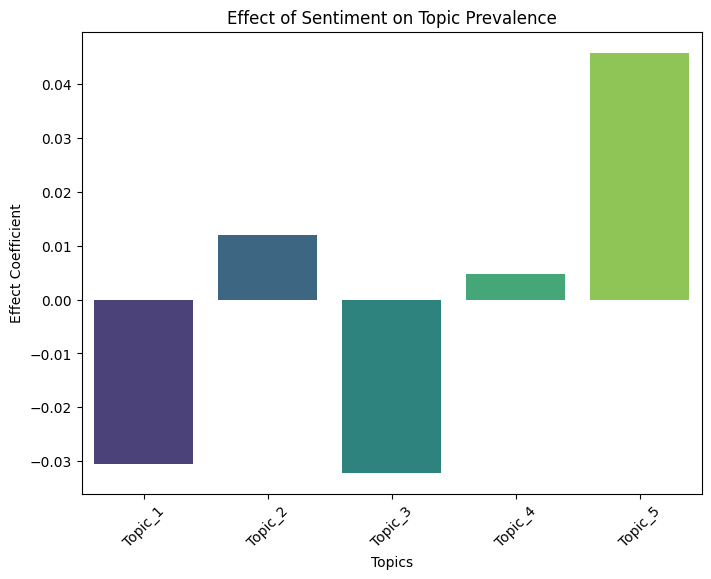

In [33]:
%pip install textblob
from textblob import TextBlob
# Step 1: Extract Topic Proportions

# def extract_topic_proportions(model, corpus):
#     topic_proportions = []
#     for doc in corpus:
#         # Get topic distribution for the document
#         topic_dist = model.get_document_topics(doc, minimum_probability=0)
#         # Convert sparse distribution to dense representation
#         topic_proportions.append(sparse2full(topic_dist, num_terms=model.num_topics))
#     return np.array(topic_proportions)

#chat fix
def extract_topic_proportions(model, corpus):
    topic_proportions = []
    for doc in corpus:
        # Get topic distribution for the document
        topic_dist = model.get_document_topics(doc, minimum_probability=0)
        # Convert sparse distribution to dense representation
        # Removed num_terms argument, sparse2full infers dimensions
        topic_proportions.append(sparse2full(topic_dist, model.num_topics))
    return np.array(topic_proportions)




# Ensure the 5-topic model exists in the dictionary
if 5 in models:
    print("Using the 5-topic model...")
    selected_model = models[5]  # Access the 5-topic model
    topic_proportions = extract_topic_proportions(selected_model, corpus)

    # Step 2: Combine Topic Proportions with Metadata
    topic_columns = [f"Topic_{i+1}" for i in range(selected_model.num_topics)]
    topic_df = pd.DataFrame(topic_proportions, columns=topic_columns)

    # Ensure metadata index matches topic proportions
    metadata = metadata.reset_index(drop=True)
    combined_df = pd.concat([topic_df, metadata], axis=1)

    # Calculate and add Sentiment column
    combined_df['Sentiment'] = data['Review'].apply(lambda text: TextBlob(text).sentiment.polarity)

    # Step 3: Estimate Topic Effects
    # def estimate_effects(combined_df, dependent_vars, independent_var):
    #     results = {}
    #     for topic in dependent_vars:
    #         df = combined_df[[independent_var, topic]].dropna()
    #         X = combined_df[[independent_var]]
    #         y = combined_df[topic]

    #         # Fit a linear regression model
    #         model = LinearRegression()
    #         model.fit(X, y)

    #         # Store coefficients and intercept
    #         results[topic] = {
    #             "Intercept": model.intercept_,
    #             "Coefficients": model.coef_.tolist()
    #         }
    #     return results

    def estimate_effects(combined_df, dependent_vars, independent_var):
          results = {}
          for topic in dependent_vars:
              # Drop rows with NaN values in the relevant columns
              df = combined_df[[independent_var, topic]].dropna()
              X = df[[independent_var]]  # Use the filtered DataFrame
              y = df[topic]            # Use the filtered DataFrame

              # Fit a linear regression model
              model = LinearRegression()
              model.fit(X, y)

              # Store coefficients and intercept
              results[topic] = {
                  "Intercept": model.intercept_,
                  "Coefficients": model.coef_.tolist()
              }
          return results

    # Set dependent variables (topics) and independent variable (metadata column)
    dependent_vars = topic_columns
    independent_var = "Sentiment"  # Example: metadata column for sentiment analysis

    # Run the effect estimation
    effects = estimate_effects(combined_df, dependent_vars, independent_var)

    # Step 4: Visualize Topic Effects
    def plot_effects(effects, independent_var, num_topics=5):
        topic_ids = list(effects.keys())[:num_topics]
        coefficients = [effects[topic]['Coefficients'][0] for topic in topic_ids]

        plt.figure(figsize=(8, 6))
        sns.barplot(x=topic_ids, y=coefficients, palette="viridis")
        plt.title(f"Effect of {independent_var} on Topic Prevalence")
        plt.xlabel("Topics")
        plt.ylabel("Effect Coefficient")
        plt.xticks(rotation=45)
        plt.show()

    # Visualize the effects for the first 5 topics
    plot_effects(effects, independent_var, num_topics=5)
else:
    print("5-topic model not found in the models dictionary.")


# **Step 7: Hierarchical Correlation of Topics**
To compute correlations between topics and visualize topic relationships interactively, we can use the following process:

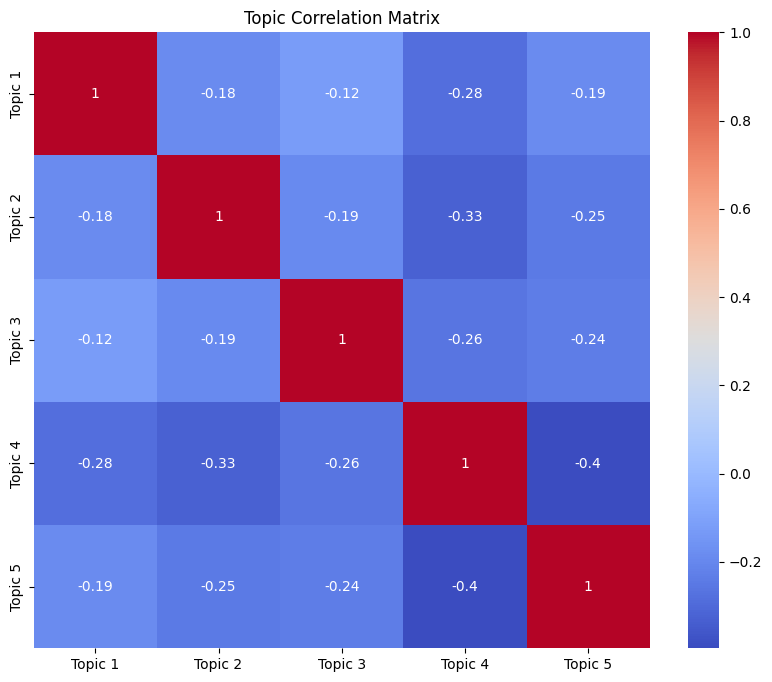

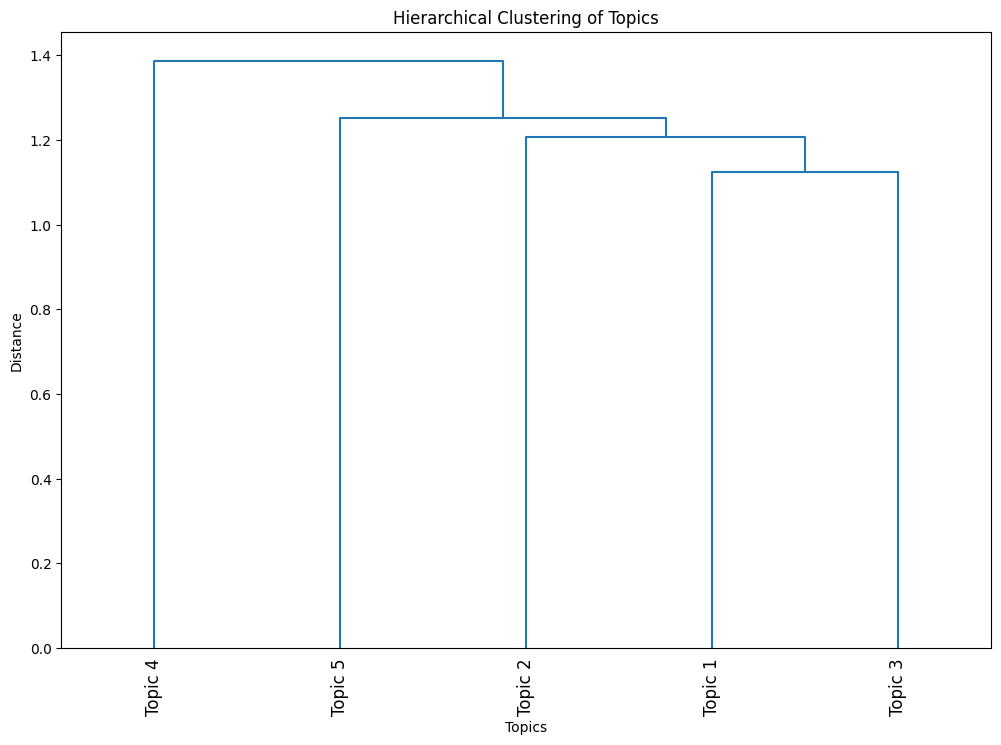

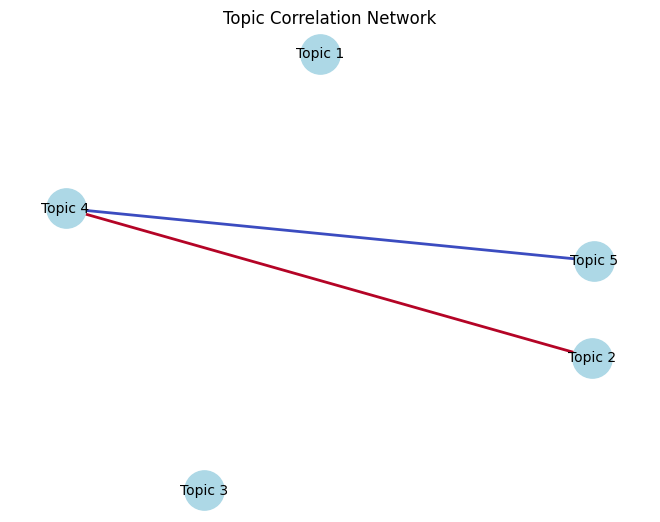

In [34]:
from scipy.spatial.distance import squareform # Import the missing function
def compute_topic_correlations(topic_proportions):
    """
    Compute pairwise correlations between topics based on document-topic proportions.
    """
    correlation_matrix = np.corrcoef(topic_proportions.T)  # Correlation of topics
    return correlation_matrix

# Use the topic proportions from Step 6
if 'topic_proportions' in locals():
    correlation_matrix = compute_topic_correlations(topic_proportions)

    # Step 2: Visualize Correlation Matrix
    def plot_correlation_matrix(correlation_matrix, topic_labels):
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            correlation_matrix,
            annot=True,
            cmap="coolwarm",
            xticklabels=topic_labels,
            yticklabels=topic_labels,
            square=True,
            cbar=True
        )
        plt.title("Topic Correlation Matrix")
        plt.show()

    topic_labels = [f"Topic {i+1}" for i in range(correlation_matrix.shape[0])]
    plot_correlation_matrix(correlation_matrix, topic_labels)

    # Step 3: Visualize Hierarchical Clustering
    def plot_dendrogram(correlation_matrix, topic_labels):
        """
        Plot a dendrogram to visualize hierarchical clustering of topics based on correlations.
        """
        distance_matrix = 1 - correlation_matrix  # Convert correlations to distances
        condensed_distance = squareform(distance_matrix, checks=False)  # Convert to condensed form
        linkage_matrix = linkage(condensed_distance, method='ward')  # Hierarchical clustering

        plt.figure(figsize=(12, 8))
        dendrogram(
            linkage_matrix,
            labels=topic_labels,
            leaf_rotation=90,
            leaf_font_size=12,
            color_threshold=0.5
        )
        plt.title("Hierarchical Clustering of Topics")
        plt.xlabel("Topics")
        plt.ylabel("Distance")
        plt.show()

    plot_dendrogram(correlation_matrix, topic_labels)

    # Step 4: Visualize as a Network Graph
    def plot_topic_network(correlation_matrix, topic_labels, threshold=0.3):
        """
        Plot a network graph of topics where edges represent significant correlations.
        """
        G = nx.Graph()

        # Add nodes
        for i, label in enumerate(topic_labels):
            G.add_node(i, label=label)

        # Add edges for significant correlations
        for i in range(correlation_matrix.shape[0]):
            for j in range(i+1, correlation_matrix.shape[1]):
                if abs(correlation_matrix[i, j]) > threshold:
                    G.add_edge(i, j, weight=correlation_matrix[i, j])

        # Draw the network
        pos = nx.spring_layout(G, seed=42)  # Force-directed layout
        edge_weights = [G[u][v]['weight'] for u, v in G.edges]
        nx.draw(
            G, pos, with_labels=True,
            labels=nx.get_node_attributes(G, 'label'),
            node_size=800,
            node_color="lightblue",
            font_size=10,
            font_color="black",
            edge_color=edge_weights,
            edge_cmap=plt.cm.coolwarm,
            width=2
        )
        plt.title("Topic Correlation Network")
        plt.show()

    plot_topic_network(correlation_matrix, topic_labels)
else:
    print("Topic proportions not found. Ensure Step 6 is completed.")

# **More Advanced Visualisations**

more detailed and insightful visualizations to better understand the results from Structural Topic Modeling (STM). These visualizations include:

Topic Contrast Plots: Visualize the contrast between specific pairs of topics.
Topic-Document Gamma Distributions (Theta Values): Show how much each document contributes to a given topic.
Bar Plots for Top Terms: Highlight the most important terms for each topic.


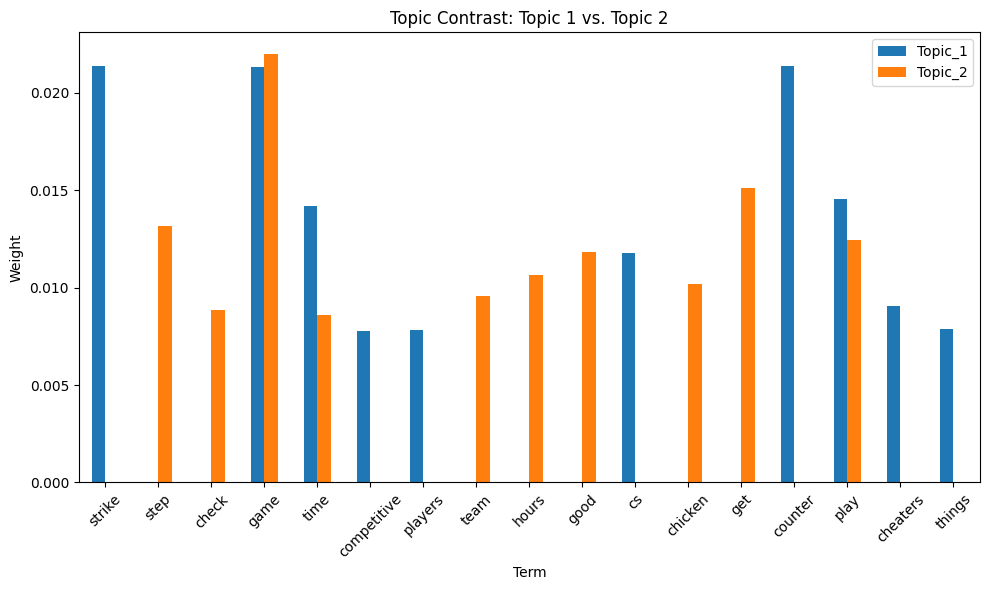

Saved contrast plot to STM_Advanced_Visualizations/topic_contrast_1_2.png


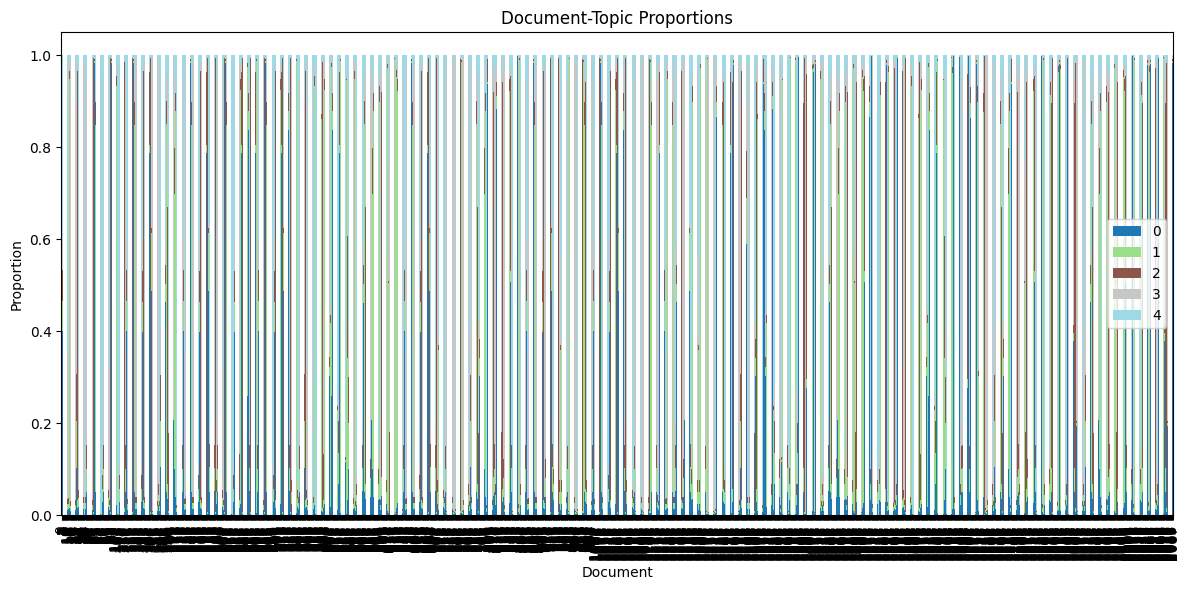

Saved topic proportions plot to STM_Advanced_Visualizations/document_topic_proportions.png


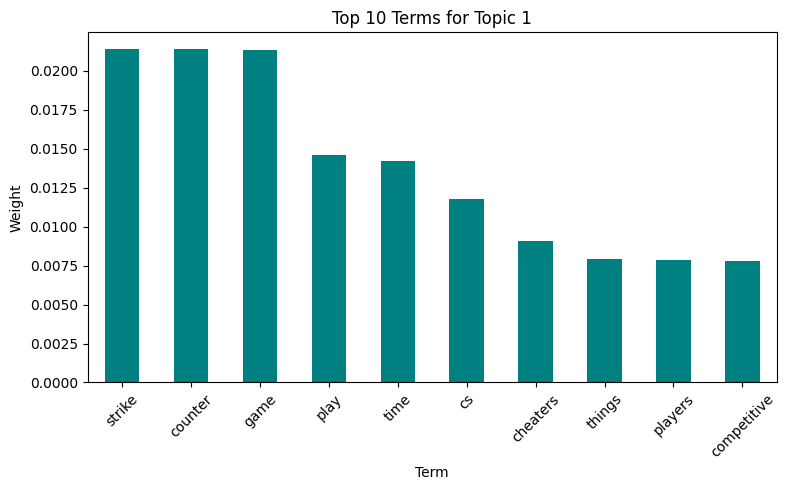

Saved top terms plot for Topic 1 to STM_Advanced_Visualizations/top_terms_topic_1.png


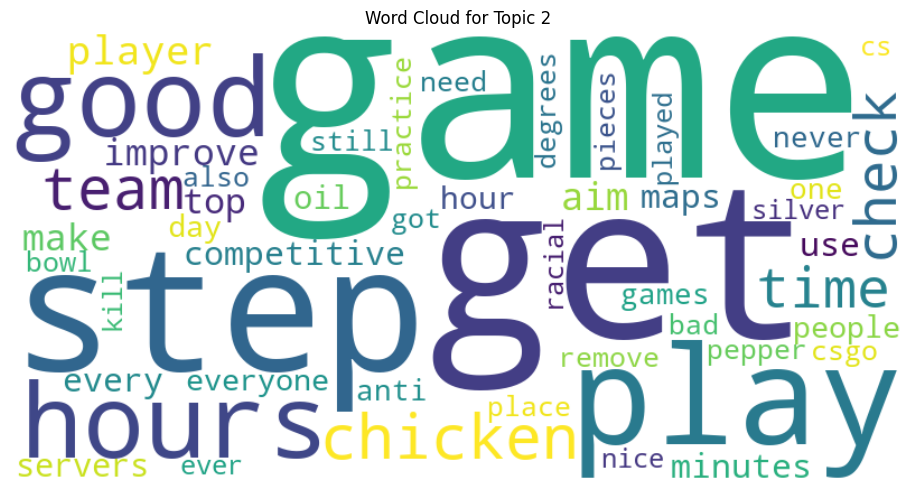

Saved word cloud for Topic 2 to STM_Advanced_Visualizations/wordcloud_topic_2.png


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import os

# Ensure the output directory exists
output_dir = 'STM_Advanced_Visualizations'
os.makedirs(output_dir, exist_ok=True)

# 1. Topic Contrast Plots
def plot_topic_contrasts(model, topic1, topic2, dictionary, num_words=10):
    terms1 = dict(model.show_topic(topic1, num_words))
    terms2 = dict(model.show_topic(topic2, num_words))

    # Combine terms
    all_terms = set(terms1.keys()).union(set(terms2.keys()))
    contrast_df = pd.DataFrame({
        "Term": list(all_terms),
        f"Topic_{topic1+1}": [terms1.get(term, 0) for term in all_terms],
        f"Topic_{topic2+1}": [terms2.get(term, 0) for term in all_terms]
    })

    # Plot
    contrast_df.set_index("Term").plot(kind="bar", figsize=(10, 6))
    plt.title(f"Topic Contrast: Topic {topic1+1} vs. Topic {topic2+1}")
    plt.ylabel("Weight")
    plt.xlabel("Term")
    plt.xticks(rotation=45)
    plt.tight_layout()
    contrast_plot_path = os.path.join(output_dir, f"topic_contrast_{topic1+1}_{topic2+1}.png")
    plt.savefig(contrast_plot_path)
    plt.show()
    print(f"Saved contrast plot to {contrast_plot_path}")

# Example: Compare Topic 0 and Topic 1 from a model
selected_model = models[5]  # For example, the 5-topic model
plot_topic_contrasts(selected_model, 0, 1, dictionary)

# 2. Topic-Document Gamma Distributions (Theta Values)
def plot_topic_proportions(topic_proportions, doc_indices=None):
    if doc_indices is None:
        doc_indices = range(topic_proportions.shape[0])
    topic_df = pd.DataFrame(topic_proportions[doc_indices])
    topic_df.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='tab20')
    plt.title("Document-Topic Proportions")
    plt.xlabel("Document")
    plt.ylabel("Proportion")
    plt.tight_layout()
    proportions_plot_path = os.path.join(output_dir, "document_topic_proportions.png")
    plt.savefig(proportions_plot_path)
    plt.show()
    print(f"Saved topic proportions plot to {proportions_plot_path}")

# Example: Visualize document-topic proportions
plot_topic_proportions(topic_proportions)

# 3. Bar Plots for Top Terms
def plot_top_terms(model, topic_id, num_terms=10):
    terms = model.show_topic(topic_id, num_terms)
    terms_df = pd.DataFrame(terms, columns=["Term", "Weight"]).set_index("Term")
    terms_df.plot(kind='bar', legend=False, figsize=(8, 5), color='teal')
    plt.title(f"Top {num_terms} Terms for Topic {topic_id+1}")
    plt.ylabel("Weight")
    plt.xlabel("Term")
    plt.xticks(rotation=45)
    plt.tight_layout()
    top_terms_plot_path = os.path.join(output_dir, f"top_terms_topic_{topic_id+1}.png")
    plt.savefig(top_terms_plot_path)
    plt.show()
    print(f"Saved top terms plot for Topic {topic_id+1} to {top_terms_plot_path}")

# Example: Visualize top terms for Topic 1
plot_top_terms(selected_model, 0)

# 4. Topic Word Clouds
def generate_word_cloud(model, topic_id, num_words=50):
    terms = dict(model.show_topic(topic_id, num_words))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(terms)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Topic {topic_id+1}")
    plt.tight_layout()
    wordcloud_path = os.path.join(output_dir, f"wordcloud_topic_{topic_id+1}.png")
    plt.savefig(wordcloud_path)
    plt.show()
    print(f"Saved word cloud for Topic {topic_id+1} to {wordcloud_path}")

# Example: Generate word cloud for Topic 2
generate_word_cloud(selected_model, 1)
